<a href="https://colab.research.google.com/github/Natasha-70/PRODIGY_DS-/blob/main/PRODIGY_DS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')

In [ ]:
#Display basic info
print("Dataset shape:", df.shape)
print("Data types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Dataset shape: (8807, 12)
Data types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
#Drop duplicates if any
df.drop_duplicates(inplace=True)

In [ ]:
#Fill missing values (optional strategies)
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('No Director')
df['cast'] = df['cast'].fillna('No Cast')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

/tmp/ipython-input-12-2099312616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


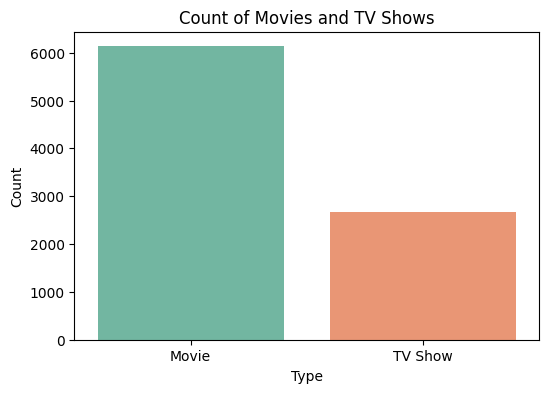

In [ ]:
#Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Create new column for year added
df['year_added'] = df['date_added'].dt.year
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


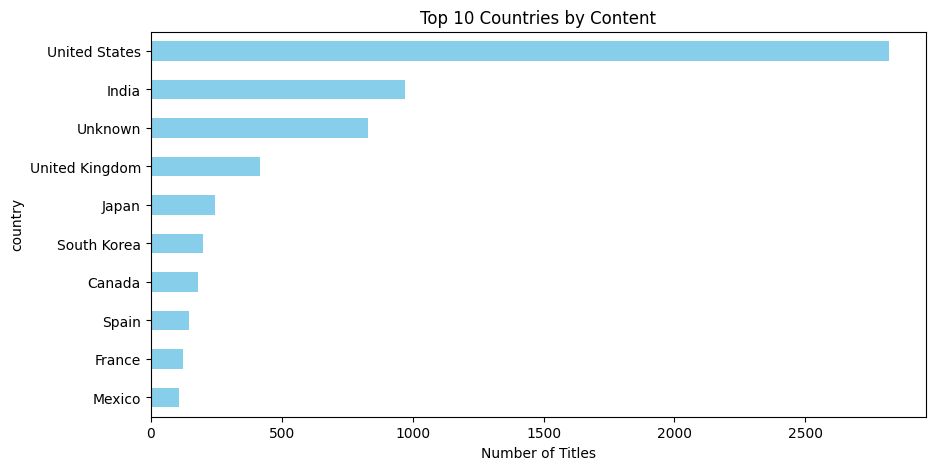

In [ ]:
plt.figure(figsize=(10, 5))
df['country'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Countries by Content')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()

/tmp/ipython-input-14-976271372.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, y='Genre', x='Count', palette='viridis')


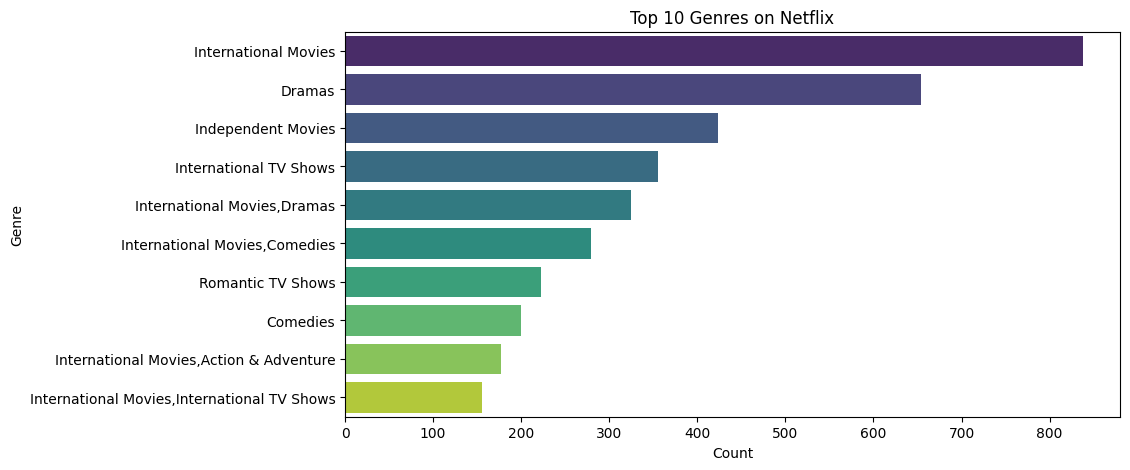

In [ ]:
# Most common genres (listed_in)
from collections import Counter
genres = ','.join(df['listed_in'].dropna()).split(', ')
genre_count = Counter(genres)
top_genres = pd.DataFrame(genre_count.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(data=top_genres, y='Genre', x='Count', palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.show()


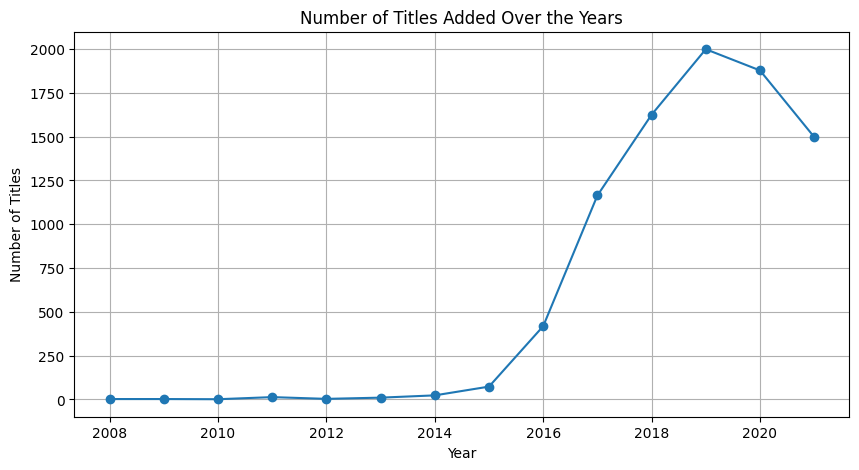

In [ ]:
# Content Added Over the Years
plt.figure(figsize=(10, 5))
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Titles Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

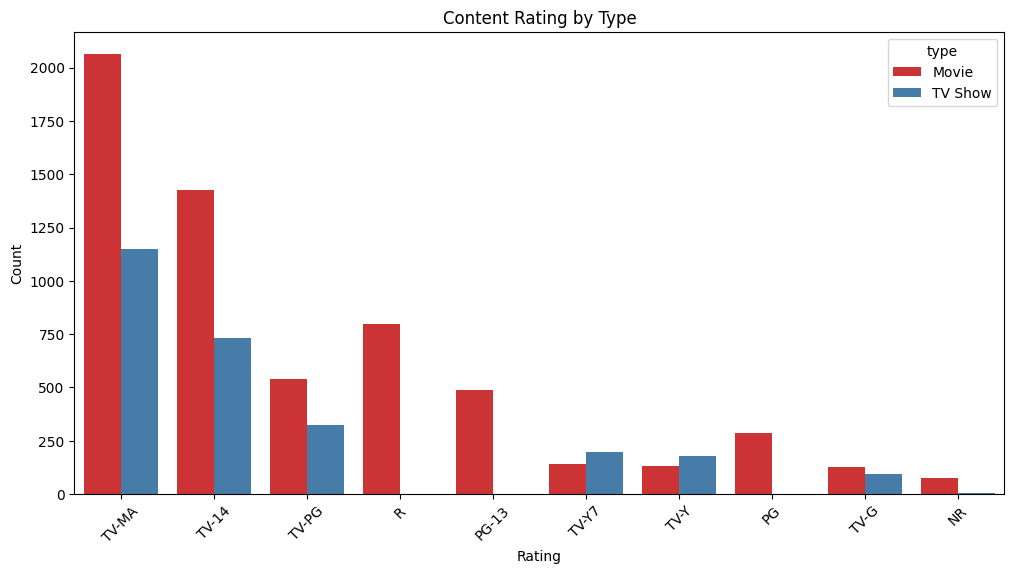

In [ ]:
# Content by Type and Rating
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index[:10], palette='Set1')
plt.title('Content Rating by Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

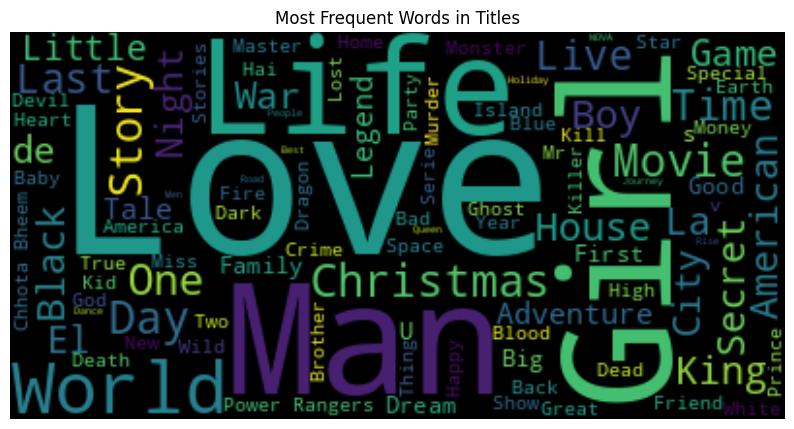

In [ ]:
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(background_color='black', max_words=100).generate(' '.join(df['title'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Titles')
plt.show()